# Exploratory Data Analysis with Pandas

Today we'll work on doing some exploratory data analysis and modelling with Pandas.

The bulk of this session will consist of working with the height and weight data that we used yesterday when we first started using Pandas.

At the start we'll be working together and then you will work on some projects on your own.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('text', usetex=False)

First let's load the full dataset instead of just using the small portion that we learned Pandas with yesterday

In [3]:
ls ../Data/

Roster/                             gauss_too.dat
credit_delinquency.csv              gpa_data.csv
die_series.dat                      individual_physical_attributes.csv
exceldata.xlsx                      pandas_test_data.csv
gauss.dat


In [4]:
adf = pd.read_csv('../Data/individual_physical_attributes.csv')

First, a little context. This data comes from a weight-loss website where users join and then record their weight on a daily or weekly basis to track their progress. We'll pretend that we are the data scientists at this company and try to understand some of our user behavior.

I've only pulled the basic data about the personal attributes and the beginning and final weight.

To get a quick sense of a dataset, Pandas has a great function like scipy to get a sense of the data.

In [5]:
adf.describe()

,Initial_Weight,Final_Weight,Height,Age
count,47094.000000,47094.000000,47094.000000,47094.000000
mean,194.559445,191.340388,65.854419,42.455345
std,54.186088,54.155476,3.537568,31.106287
min,8.000000,10.000000,40.000000,-4664.000000
25%,157.000000,154.000000,64.000000,33.000000
50%,185.000000,182.500000,65.000000,42.000000
75%,222.000000,218.600000,68.000000,52.000000
max,2737.000000,2737.000000,195.000000,945.000000


Right away form looking at the maximums in every attribute we can tell that we have some data quality issues. This could be for a number of reasons, people could have entered their age, weight, or height incorrectly or the website designers could have created these *fake* accounts to test that the website was working properly.

In any case, we'll want to exclude individuals who have obviously wrong information.

Let's start with age. Since this site presumably has an agreement stating that you must be at least 13, let's set our bounds to be 13 and 80. 

But how many individuals are we excluding if we do that?

Now let's make a new dataframe and limit it to the people that are older than 13 and younger than 80.

In [6]:
agedf = adf[(adf.Age>=13) & (adf.Age < 80)]

Did that happen to take care of all of our problems?

In [7]:
agedf.describe()

,Initial_Weight,Final_Weight,Height,Age
count,46926.000000,46926.000000,46926.000000,46926.000000
mean,194.695110,191.472590,65.874185,42.566402
std,53.984743,53.969482,3.494192,12.436145
min,8.000000,10.000000,49.000000,13.000000
25%,157.000000,154.400000,64.000000,33.000000
50%,185.000000,182.600000,65.000000,42.000000
75%,222.000000,218.875000,68.000000,52.000000
max,2737.000000,2737.000000,195.000000,79.000000


Still problems, but let's look at this in a graph to see if we can understand what's going on a little bit better

/Users/adampah/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


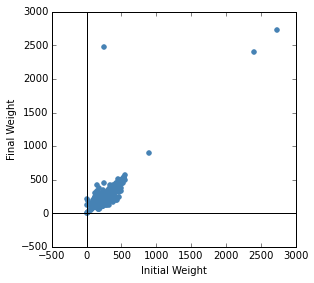

In [8]:
#Let's make a scatter plot
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121) 
ax.scatter(agedf.Initial_Weight, agedf.Final_Weight, color='steelblue')
#Set some lines quickly with the v and h spans
ax.axvspan(-0.5, 0.5)
ax.axhspan(-0.5, 0.5)
#Set the labels
ax.set_ylabel('Final Weight')
ax.set_xlabel('Initial Weight')

# ax = fig.add_subplot(122) 
# ax.scatter(agedf.Initial_Weight, agedf.Final_Weight, color='steelblue')
# #Zoom it in
# ax.set_xlim(0,100)
# ax.set_ylim(0,100)
# #Set the labels
# ax.set_ylabel('Final Weight')
# ax.set_xlabel('Initial Weight')

plt.tight_layout()

We can also be more rigorous and look at the distribution of weight values, and determine what weights are 3 standard deviations away from the mean.

Since we'll want to do this for both the Initial and Final Weight we'll make a function

In [9]:
def find_stdev(df, column_name, num_std=3):
    '''
    Returns the value of -3 and +3 standard deviations from the mean
    input:
        dataframe
        column_name to calculate for
    output:
        minus_three
        plus_three
    '''
    mean = df[column_name].mean()
    stdev = df[column_name].std()
    minus_three = mean - num_std * stdev
    plus_three = mean + num_std * stdev
    return minus_three, plus_three

def plot_weight_features(df, column_name, num_std=3):
    '''
    Plots the histogram of the weight, as well as the point that is three standard deviations away from the mean
    '''
    minus_three, plus_three = find_stdev(df, column_name, num_std=num_std)
    #Start the plot
    with mpl.style.context(('bmh')):
        fig = plt.figure()
        ax = fig.add_subplot(111, axisbg = 'white')
        #Plot the histogram
        numbins = (df[column_name].max() - df[column_name].min() )/ 2
        n, bins, patches = ax.hist(df[column_name].values, bins=numbins)
        #Now let's plot the minus and plus three standard deviation points
        ax.vlines([minus_three, plus_three], [0, 0], [max(n), max(n)], color='black')
        #Graph labelling
        ax.set_ylabel('Count')
        ax.set_xlabel(column_name)

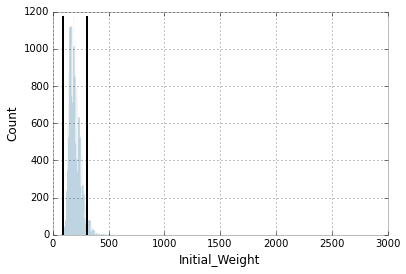

In [10]:
plot_weight_features(agedf, 'Initial_Weight', num_std = 2)

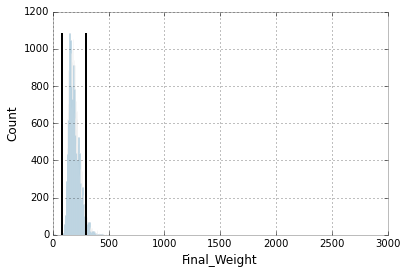

In [11]:
plot_weight_features(agedf, 'Final_Weight', num_std = 2)

So let's set our data anlysis to use anyone that is within three standarad deviations of the mean

In [12]:
initial_weight_stdevs = find_stdev(agedf, 'Initial_Weight', num_std=4)

weighdf = agedf[(agedf.Initial_Weight > initial_weight_stdevs[0]) & (agedf.Initial_Weight < initial_weight_stdevs[1])]

weighdf.describe()

,Initial_Weight,Final_Weight,Height,Age
count,46797.000000,46797.000000,46797.000000,46797.000000
mean,193.895631,190.731212,65.862000,42.563989
std,49.935134,50.124458,3.485689,12.439722
min,8.000000,10.000000,49.000000,13.000000
25%,157.000000,154.100000,64.000000,33.000000
50%,185.000000,182.300000,65.000000,42.000000
75%,221.000000,218.000000,68.000000,52.000000
max,410.000000,2481.000000,195.000000,79.000000


**Whoa!** We still have someone who's weight is off the charts

In [13]:
final_weight_stdevs = find_stdev(agedf, 'Final_Weight', num_std=4)

weighdf = agedf[(agedf.Initial_Weight > initial_weight_stdevs[0]) & (agedf.Initial_Weight < initial_weight_stdevs[1]) & 
                (agedf.Final_Weight > final_weight_stdevs[0]) & (agedf.Final_Weight < final_weight_stdevs[1])]

weighdf.describe()

,Initial_Weight,Final_Weight,Height,Age
count,46788.000000,46788.000000,46788.000000,46788.000000
mean,193.869037,190.643159,65.861182,42.563307
std,49.887875,48.906684,3.484763,12.439762
min,8.000000,10.000000,49.000000,13.000000
25%,157.000000,154.000000,64.000000,33.000000
50%,185.000000,182.200000,65.000000,42.000000
75%,221.000000,218.000000,68.000000,52.000000
max,410.000000,405.000000,195.000000,79.000000


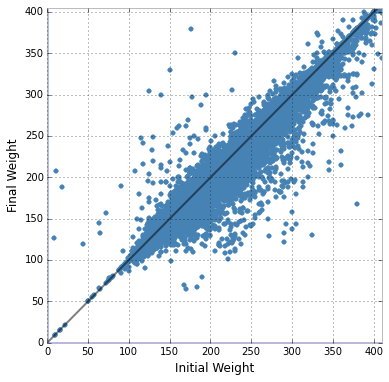

In [14]:
with mpl.style.context(('bmh')):
    #Let's make a scatter plt
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, axisbg='white') 
    ax.scatter(weighdf.Initial_Weight, weighdf.Final_Weight, color='steelblue')
    #Set some lines quickly with the v and h spans
    ax.axvspan(-0.5, 0.5)
    ax.axhspan(-0.5, 0.5)
    #Make our line of unity
    ax.plot(ax.get_xlim(), ax.get_xlim(), color='black', alpha = 0.5)
    #Set the limits
    ax.set_xlim(0, weighdf.Initial_Weight.max())
    ax.set_ylim(0, weighdf.Final_Weight.max())
    #Set the labels
    ax.set_ylabel('Final Weight')
    ax.set_xlabel('Initial Weight')

Now let's  turn our attention to the height

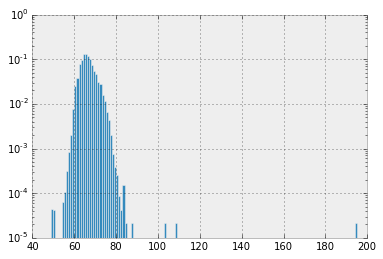

In [15]:
with mpl.style.context(('bmh')):
    bins = weighdf.Height.max() - weighdf.Height.min()
    weighdf.Height.hist(normed=True, bins = bins, log=True)
    #Set the labels
    ax.set_axis_bgcolor('white')
    ax.set_xlabel('Height')
    ax.set_ylabel('pmf')

So let's restrict the heights now

In [16]:
finaldf = weighdf[weighdf.Height < 100]
finaldf.describe()

,Initial_Weight,Final_Weight,Height,Age
count,46785.000000,46785.000000,46785.000000,46785.000000
mean,193.867767,190.641682,65.856728,42.563899
std,49.882288,48.900831,3.423512,12.439911
min,8.000000,10.000000,49.000000,13.000000
25%,157.000000,154.000000,64.000000,33.000000
50%,185.000000,182.200000,65.000000,42.000000
75%,221.000000,218.000000,68.000000,52.000000
max,410.000000,405.000000,87.000000,79.000000


So let's just look at something simple, how correlated is someone's initial weight of their final weight?

To do this we'll just fit a simple linear model to the data.


If we're curious about initial weight predicting final weight then:

initial weight is the __ ? __

and 

final weight is the __ ? __

In [17]:
import scipy.stats as stats

slope, intercept, r, p, stderr = stats.linregress(finaldf.Initial_Weight, finaldf.Final_Weight)

print( "The slope is " + str(slope) )
print( "The intercept is " + str(intercept) )
print( "The standard error is " + str(stderr) )
print( "P-value for the fit: " + str(p) )
print( "R^2 of the fit: " + str(r ** 2 ) )

The slope is 0.957028118094
The intercept is 5.10477773809
The standard error is 0.000982211197008
P-value for the fit: 0.0
R^2 of the fit: 0.953036756429


Some of these numbers should be familiar to everyone. 

A line is described by the formula 

$y = mx + b$

and we know what the $y$ and $x$ are. The slope is still $m$ and the intercept is $b$.

The standard error is the error associated with the estimate of the values.

The p-value is from the two-sided hypothesis test with a null hypothesis that the slope of the line is zero. A slope of zero means that there is no relationship between the two variables (meaning the input changes while the output does not).

The $r^2$ is the coefficient of determination (the r-value is the correlation coefficient). The $r^2$ describes how well the data fit the model, or said another way how much of the variance in the data is explained by the model in comparsion to the total variance in the data.

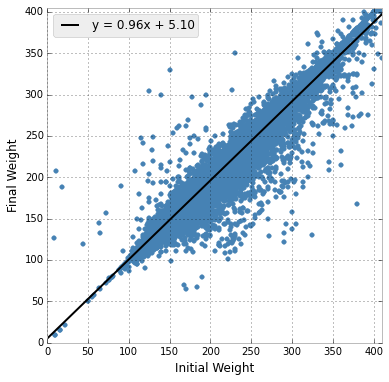

In [18]:
with mpl.style.context(('bmh')):
    #Let's make a scatter plt
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, axisbg='white') 
    ax.scatter(finaldf.Initial_Weight, finaldf.Final_Weight, color='steelblue')
    #Add the best fit line
    x = np.linspace(0, 600, 600)
    y = slope * x + intercept
    plt.plot(x, y, label = 'y = %.2fx + %.2f' % (slope, intercept) , color = 'black')
    #Set the limits
    ax.set_xlim(0, weighdf.Initial_Weight.max())
    ax.set_ylim(0, weighdf.Final_Weight.max())
    #Set the labels
    ax.legend(loc=2)
    ax.set_ylabel('Final Weight')
    ax.set_xlabel('Initial Weight')

# Is this relationship between Initial Weight and Final Weight affected by age?

Let's break this data down by specific ages using the `groupby` function in Pandas

In [19]:
gdf = finaldf.groupby('Age')

print( type(gdf) )

<class 'pandas.core.groupby.DataFrameGroupBy'>


Now there are some different functions that we use with a grouped dataframe

In [20]:
gdf.ngroups

67

In [21]:
gdf.describe()

Final_Weight     Height  Initial_Weight
Age                                               
13  count     38.000000  38.000000       38.000000
    mean     150.133684  63.447368      149.770526
    std       40.301827   2.390266       39.243721
    min       66.800000  57.000000       63.000000
    25%      123.500000  62.000000      123.500000
    50%      152.300000  63.500000      156.500000
    75%      172.750000  65.000000      172.750000
    max      247.400000  68.000000      240.000000
14  count     40.000000  40.000000       40.000000
    mean     159.515000  64.525000      168.090000
    std       44.750754   3.234331       50.555721
    min       98.000000  58.000000       98.000000
    25%      128.000000  62.000000      131.500000
    50%      146.650000  64.500000      160.900000
    75%      190.000000  66.000000      192.250000
    max      312.000000  73.000000      312.000000
15  count     55.000000  55.000000       55.000000
    mean     166.512909  65.090909      167.512727
    std       43.315813   3.044562       43.354794
    min       76.000000  60.000000       76.000000
    25%      137.000000  63.000000      137.000000
    50%      157.000000  65.000000      160.000000
    75%      193.500000  67.000000      198.500000
    max      270.000000  73.000000      270.000000
16  count     60.000000  60.000000       60.000000
    mean     163.488333  65.000000      164.760000
    std       38.720783   3.668464       38.681994
    min      104.000000  54.000000      104.000000
    25%      136.750000  63.000000      140.000000
    50%      150.300000  64.000000      154.500000
...                 ...        ...             ...
76  std       30.344085   3.731213       27.593936
    min      120.000000  60.000000      137.000000
    25%      178.500000  64.000000      181.000000
    50%      198.000000  66.000000      204.000000
    75%      217.000000  69.000000      221.000000
    max      256.000000  75.000000      260.000000
77  count     34.000000  34.000000       34.000000
    mean     201.585294  66.882353      202.529412
    std       47.214341   4.463758       47.422815
    min      132.000000  59.000000      132.000000
    25%      170.000000  64.000000      171.250000
    50%      188.300000  66.000000      189.500000
    75%      232.000000  71.000000      229.000000
    max      310.000000  77.000000      310.000000
78  count     21.000000  21.000000       21.000000
    mean     201.019048  67.047619      202.904762
    std       30.818251   4.398593       32.104368
    min      123.000000  57.000000      123.000000
    25%      182.200000  65.000000      182.000000
    50%      209.000000  66.000000      214.000000
    75%      222.000000  71.000000      223.000000
    max      245.000000  73.000000      245.000000
79  count     16.000000  16.000000       16.000000
    mean     199.537500  65.125000      202.875000
    std       40.326449   2.895399       40.956684
    min      142.000000  61.000000      145.000000
    25%      169.000000  63.750000      172.500000
    50%      200.500000  65.000000      202.000000
    75%      221.000000  65.250000      230.750000
    max      295.000000  72.000000      300.000000

[536 rows x 3 columns]

In [ ]:
type( gdf.groups )

In [ ]:
tkey = list(gdf.groups.keys())[0]
gdf.groups[tkey]

In [ ]:
tindex = gdf.groups[tkey]
finaldf.loc[tindex]

In [ ]:
with mpl.style.context(('bmh')):
    #Make a colormap that has enough colors for ust to access
    cmap = mpl.cm.BuPu( np.linspace(0, 1, gdf.ngroups) )
    #Start the figure
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, axisbg='white')
    #Now let's start going through this
    for i, (row_key, row_indices) in enumerate( sorted( gdf.groups.items() ) ):
        ax.scatter(finaldf.loc[row_indices].Initial_Weight,
                   finaldf.loc[row_indices].Final_Weight,
                   color=cmap[i])
    ax.set_ylabel('Final Weight')
    ax.set_xlabel('Initial Weight')

Too many age groups! It would be so much better if we just binned it....

Let's work on a small class project where we bin the users into decades of age.

In [ ]:
#CLASSWORK, WRITE A FUNCTION TO RETURN THE AGEBIN
def age_bin_finder(age_of_person, start_age = 10, end_age = 90, age_increment = 10):
    #First lets set up our lists
    leading_edges = range(start_age, end_age - age_increment, age_increment)
    lagging_edges = range(start_age + age_increment, end_age, age_increment)
    #Now let's go through our bin edges, we'll stop when we find the age of the person
    for lead_edge, lag_edge in zip(leading_edges, lagging_edges):
        #Check to see if our person is inside this bin
        if age_of_person >= lead_edge and age_of_person < lag_edge:
            age_bin = str(lead_edge) + '-' + str(lag_edge)
            return age_bin

But now how do we `apply` a function to the dataframe?

In [ ]:
finaldf['Age_Bin'] = finaldf.Age.apply(age_bin_finder)

In [ ]:
finaldf.head()

Now let's plot this and look at how it breaks apart by age

In [ ]:
agebinned = finaldf.groupby('Age_Bin')

with mpl.style.context(('bmh')):
    #Make a colormap that has enough colors for ust to access
    cmap = mpl.cm.Set2( np.linspace(0, 1, agebinned.ngroups) )
    #Start the figure
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, axisbg='white')
    #Now let's start going through this
    for i, (agebin, row_indices) in enumerate(sorted(agebinned.groups.items())):
        ax.scatter(finaldf.loc[row_indices].Initial_Weight,
                   finaldf.loc[row_indices].Final_Weight,
                   color=cmap[i],
                   label = agebin)
    #Set the labels and the legend
    ax.set_ylabel('Final Weight')
    ax.set_xlabel('Initial Weight')
    ax.legend(loc=2)

Tough to tell what is going on in this plot with all of the age bins laid on top of each other.

Let's make a facet plot

In [ ]:
with mpl.style.context(('bmh')):
    #Make a colormap that has enough colors for ust to access
    cmap = mpl.cm.Set2( np.linspace(0, 1, agebinned.ngroups + 1) )
    #Start the figure
    fig = plt.figure(figsize=(12,12))
    #Now let's start going through this
    for i, (agebin, row_indices) in enumerate(sorted(agebinned.groups.items())):
        ax = fig.add_subplot('33'+ str(i + 1), axisbg='white')
        #Our background data
        ax.scatter(finaldf.Initial_Weight,
                   finaldf.Final_Weight,
                   color = cmap[-1],
                   label = 'All',
                   alpha=0.5)
        #Our grouped data
        ax.scatter(finaldf.loc[row_indices].Initial_Weight,
                   finaldf.loc[row_indices].Final_Weight,
                   color=cmap[i],
                   label = agebin)
        #Set the labels and the legend
        ax.legend(loc=2)
        ax.set_ylabel('Final Weight')
        ax.set_xlabel('Initial Weight')
    plt.tight_layout()

Let's just take a look at these $r^2$ values and fitted values for the different age groups

In [ ]:
#Student exercise to fit the linear model to each age group individually and print a table




In [ ]:
#Student exercise to modify the facet code to plot the linear regressions




In [ ]:
#Dictionary to hold the values for the binned fits
binned_fits = {}
#Iterate through each group
for age_bin, row_indices in agebinned.groups.items():
    #Pull the data from the composite dataframe
    xdata = finaldf.loc[row_indices].Initial_Weight
    ydata = finaldf.loc[row_indices].Final_Weight
    #Fit the parameters 
    slope, intercept, r, p, stderr = stats.linregress(xdata, ydata)
    binned_fits[age_bin] = {'slope': slope,
                            'intercept': intercept,
                            'r_squared': r**2,
                            'p_value': p,
                            'stderr': stderr,
                            'N': finaldf.loc[row_indices].Final_Weight.count()}

#Now, let's just look at this in a quick table
for i, (agebin, age_params) in enumerate( sorted( binned_fits.items() ) ):
    #Print a header
    if i==0:
        header = ['Age Bin']
        age_param_names = ['slope', 'intercept', 'stderr', 'p_value', 'r_squared', 'N']
        header += age_param_names
        print( '\t'.join(header) )
    #Now print the rest of the values
    row_line = [agebin]
    for param_name in age_param_names:
        row_line.append( "{0:.4f}".format(age_params[param_name]) )
    print( '\t'.join(row_line) )

In [ ]:
with mpl.style.context(('bmh')):
    #Make a colormap that has enough colors for ust to access
    cmap = mpl.cm.Set2( np.linspace(0, 1, agebinned.ngroups + 1) )
    #Start the figure
    fig = plt.figure(figsize=(12,12))
    #Now let's start going through this
    for i, (agebin, row_indices) in enumerate(sorted(agebinned.groups.items())):
        ax = fig.add_subplot('33'+ str(i + 1), axisbg='white')
        #Our background data
        ax.scatter(finaldf.Initial_Weight,
                   finaldf.Final_Weight,
                   color = cmap[-1],
                   label = 'All',
                   alpha=0.5)
        #Our grouped data
        ax.scatter(finaldf.loc[row_indices].Initial_Weight,
                   finaldf.loc[row_indices].Final_Weight,
                   color=cmap[i],
                   label = agebin)
        #Now set up the line
        binned_fits[agebin]['slope'] 
        x = np.linspace(0, 600, 600)
        slope = binned_fits[agebin]['slope']
        intercept = binned_fits[agebin]['intercept']
        y = slope * x + intercept
        ax.plot(x, y, label = 'y = %.3fx + %.2f' % (slope, intercept) , color = 'black', alpha=0.7)
        #Set the labels and the legend
        ax.legend(loc=2, frameon = False)
        ax.set_ylabel('Final Weight')
        ax.set_xlabel('Initial Weight')
    plt.tight_layout()

Hmmmm.... there are some differences between the groups but are they significantly different from the overall average?

We're interested in the weight lost, so let's compute that

In [ ]:
finaldf['Weight_Diff'] = finaldf['Final_Weight'] - finaldf['Initial_Weight']

finaldf.head(10)

And since this is a new data column for us, let's look at it by plotting

In [ ]:
with mpl.style.context(('bmh')):
    #Create the figure
    fig = plt.figure(figsize = (10,10))
    #Add the data
    for i, (agebin, row_indices) in enumerate( sorted( agebinned.groups.items() ) ):
        #Create the subplot
        ax = fig.add_subplot('33' + str(i+1), axisbg='white')
        #Pull out the data for this round and identify the number of bins
        tempdata = finaldf.loc[row_indices].Weight_Diff
        numbins = (tempdata.max() - tempdata.min()) / 10
        #Important difference, we're plotting directly with matplotlib
        #So we need to tell it to use tempdata.values, not just tempdata
        #Using .values makes turns the Pandas Series into a Numpy Array
        ax.hist(tempdata.values, bins=numbins, normed=True, log=True, color=cmap[i], label=agebin)
        #Set the maximum and minimum
        ax.set_xlim(-300, 300)
        #Add the graph elements
        ax.legend(loc='best', frameon=False)
        ax.set_ylabel('pdf')
        ax.set_xlabel('Weight Difference (Final-Initial)')
    plt.tight_layout()

Now, we could test if each age group is different from the others using an ANOVA, which is the analysis of variance.

It tests to see if the means of different groups are significantly different. If there are only two groups then this test is the same as applying a t-test to the two group means. The ANOVA is different than the t-test because it allows for multiple group comparison.

In Scipy this function is called the `f_oneway()`

In [ ]:
datalabels, datasets = [], []

for agebin, row_indices in sorted( agebinned.groups.items() ):
    datalabels.append( agebin )
    datasets.append( finaldf.loc[row_indices].Weight_Diff )
    
f_value, p_value = stats.f_oneway( *datasets )

print( 'The F-value is: ' + str(f_value) )
print( 'The p-value is: ' + str(p_value) )

Let's look at the ordering of the means.

In [ ]:
daverages = []
for dlabel, dset in zip(datalabels, datasets):
    daverages.append( [dset.mean(), dlabel] )
    
print('Age Bin\tAverage Weight Difference')
for daverage, dlabel in sorted( daverages ):
    print(dlabel + '\t' + str(daverage) )

Now there are many more questions to finish answering with this, such as are there just more people in the 40-70 bin with more weight to lose? To test this we could pair people from different age bins based on their starting weights and bootstrap the answer.

However, let's move away from this and analyze a different question from the dataset and let you direct the analysis.

#How does height relate to weight loss

Let's examine the relationship of **Height and weight loss**.

So what does the relationship between height and weight even look like?

In [ ]:
with mpl.style.context(('bmh')):
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg = 'white')
    ax.scatter(finaldf.Height, finaldf.Initial_Weight, color='steelblue')
    
    ax.set_xlabel('Height')
    ax.set_ylabel('Initial Weight')

Tough to see, but it looks like there's a positive trend. Let's add the point density into this scatter plot to help see where our datapoints lie

In [ ]:
#Set the x and y so there's less typing
x = finaldf.Height.values
y = finaldf.Initial_Weight.values
#Now we need to make a density to use as a third axis for the color
#First we'll stack x and y together so that they are paired points
xy = np.vstack([x,y])
#Now we'll use a kernel density function to make the bins and calculate the density of points in each bin
density = stats.gaussian_kde(xy)(xy)

In [ ]:
with mpl.style.context(('bmh')):
    #Now we just plot it
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg='white')
    c = ax.scatter(x, y, c = density, cmap = mpl.cm.get_cmap('cool')) 
    ax.set_xlabel('Height')
    ax.set_ylabel('Initial Weight')
    #And turn on the colorbar
    cbar = ax.figure.colorbar(c, ax = ax)
    cbar.set_label('Density')

There definitely appears to be a relationship between height and weight. When we compare the difference between heights we should use some metric that normalizes for this. Fortunately we have something, the BMI. The formula for BMI is

$BMI = 703 * \frac{weight(lb)}{height^2(in^2)}$

Let's make a function to calculate this now.

In [ ]:
#Write a function to calculate the BMI given that we'll be getting a row of data from pandas



In [ ]:
def calc_bmi(row):
    bmi = ( 703 * row[0] )/ row[1]**2
    return bmi

Now we need to calculate the Initial BMI, Final BMI, and the difference in BMI

In [ ]:
#Create the new columns using the apply function



In [ ]:
finaldf['Initial_BMI'] = finaldf.ix[:, ['Initial_Weight', 'Height']].apply(calc_bmi, axis=1)
finaldf['Final_BMI'] = finaldf.ix[:, ['Final_Weight', 'Height']].apply(calc_bmi, axis=1)
finaldf['BMI_Diff'] = finaldf['Final_BMI'] - finaldf['Initial_BMI']
finaldf.head()

In [ ]:
#Now let's plot a histogram of these BMI Differences to get a sense of the data




In [ ]:
with mpl.style.context(('bmh')):
    ax = finaldf.BMI_Diff.hist(bins=100, log=True)
    ax.set_ylabel('Count')
    ax.set_xlabel('BMI Difference')

Great! Let's take a quick look at the relationship between the change in BMI against Height

In [ ]:
#Plot the BMI Difference against the Height




In [ ]:
#Set the x and y so there's less typing
x = finaldf.Height.values
y = finaldf.BMI_Diff.values

with mpl.style.context(('bmh')):
    #Now we just plot it
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg='white')
    c = ax.scatter(x, y, color='steelblue')
    ax.set_xlabel('Height')
    ax.set_ylabel('BMI Difference')

Let's just divide people into four groups, based on whether they are above or below the median

In [ ]:
#Create a new column in the dataframe labelling individuals as either above or below the median



In [ ]:
def height_categorizer(height, median):
    if height <= median:
        return 'Below'
    else:
        return 'Above'

finaldf['Height_Cat'] = finaldf['Height'].apply(lambda x: height_categorizer(x, finaldf.Height.median()))

finaldf.head()

Great, maybe we can make a box-and-whisker plot to look at the differences between the two groups.

In [ ]:
#Make a box and whisker plot using pandas




In [ ]:
with mpl.style.context(('bmh')):
    ax = finaldf.boxplot(column='BMI_Diff', by='Height_Cat')
    ax.set_ylim(-10, 10)

Maybe we should use a histogram of the two populations against each other

In [ ]:
#Histogram of the two populations



In [ ]:
with mpl.style.context(('bmh')):
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg = 'white')
    #set the number of bins
    bins=50
    #Plot the below
    ax.hist(finaldf[finaldf['Height_Cat']=='Below'].BMI_Diff.values, bins=bins, normed=True, cumulative=True,\
            color='steelblue', label='Below')
    #Plot the above
    ax.hist(finaldf[finaldf['Height_Cat']=='Above'].BMI_Diff.values, bins=bins, normed=True, cumulative=True, \
            color='red', label='Above')
    #Zoom in
    #ax.set_xlim(-10, 10)
    #Graph labelling
    ax.set_ylabel('pdf')
    ax.set_xlabel('BMI Change')
    ax.legend(loc='best')

We can test to see if the means of the two populations are the same or not using a t-test (since we only have two groups).

You should be able to find the t-test function for two independent samples in the scipy documentation. Are the means for the two groups the same?

In [ ]:
#Perform the test



In [ ]:
t, p = stats.ttest_ind(finaldf[finaldf['Height_Cat']=='Below'].BMI_Diff.values, \
                       finaldf[finaldf['Height_Cat']=='Above'].BMI_Diff.values)

print('The p-value for the comparison is: ' + str(p))

In [ ]:
print(finaldf[finaldf['Height_Cat']=='Below'].BMI_Diff.mean())
print(finaldf[finaldf['Height_Cat']=='Above'].BMI_Diff.mean())

Without knowing about the t-test we can perform a Monte Carlo test to see if the mean from one population is likely to come from another.

Perform a MC test on the two groups.

In [ ]:
#Perform a MC test on the two height groups


In [ ]:
finaldf[finaldf.Height_Cat == 'Above'].BMI_Diff.count()

In [ ]:
import random

samp_size = int( finaldf[finaldf.Height_Cat=='Above'].BMI_Diff.count() * 0.25 ) 
mc_means = []

for i in range(5000):
    #Progress updater, because everyone loves that!
    if i % 1000 == 0:
        print("Currently at iteration " + str(i))
    #Sample and record the mean
    samp = random.sample(list( finaldf[finaldf['Height_Cat']=='Above'].BMI_Diff.values ), samp_size)
    mc_means.append( np.mean(samp) )

#Calculate the mean and standard deviation 
mc_mean = np.mean(mc_means)
mc_std = np.std(mc_means)
#Calculate how far away the 'Below' group mean is from the MC mean
std_diff = (finaldf[finaldf.Height_Cat=='Below'].BMI_Diff.mean() - mc_mean)/mc_std
print("The Below category mean is " + str(std_diff) + " standard deviations away from the Above category simulated mean")



In [ ]:
#Now let's make a plot
with mpl.style.context(('bmh')):
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg='white')
    #Plot the distribution
    n, bins, patches = ax.hist(mc_means, normed=True, color='steelblue')
    #Plot the average from the Below category
    ax.vlines([finaldf[finaldf.Height_Cat=='Below'].BMI_Diff.mean()], [0], [max(n)], color='red')
    #Labels
    ax.set_ylabel('pdf')
    ax.set_xlabel('Average BMI Change')